In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Data generation

In [13]:
observations = 1000

xs = np.random.uniform(low = -10,high =10, size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets = generated_targets)

In [14]:

training_data = np.load('TF_intro.npz')

In [26]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer = 'sgd', loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 28.8798
Epoch 2/100
32/32 - 0s - loss: 4.4433
Epoch 3/100
32/32 - 0s - loss: 1.4959
Epoch 4/100
32/32 - 0s - loss: 0.6557
Epoch 5/100
32/32 - 0s - loss: 0.4233
Epoch 6/100
32/32 - 0s - loss: 0.3648
Epoch 7/100
32/32 - 0s - loss: 0.3551
Epoch 8/100
32/32 - 0s - loss: 0.3476
Epoch 9/100
32/32 - 0s - loss: 0.3512
Epoch 10/100
32/32 - 0s - loss: 0.3442
Epoch 11/100
32/32 - 0s - loss: 0.3477
Epoch 12/100
32/32 - 0s - loss: 0.3472
Epoch 13/100
32/32 - 0s - loss: 0.3448
Epoch 14/100
32/32 - 0s - loss: 0.3447
Epoch 15/100
32/32 - 0s - loss: 0.3472
Epoch 16/100
32/32 - 0s - loss: 0.3469
Epoch 17/100
32/32 - 0s - loss: 0.3490
Epoch 18/100
32/32 - 0s - loss: 0.3512
Epoch 19/100
32/32 - 0s - loss: 0.3467
Epoch 20/100
32/32 - 0s - loss: 0.3604
Epoch 21/100
32/32 - 0s - loss: 0.3568
Epoch 22/100
32/32 - 0s - loss: 0.3473
Epoch 23/100
32/32 - 0s - loss: 0.3551
Epoch 24/100
32/32 - 0s - loss: 0.3412
Epoch 25/100
32/32 - 0s - loss: 0.3443
Epoch 26/100
32/32 - 0s - loss: 0

In [27]:
model.layers[0].get_weights()

[array([[ 1.9618219],
        [-2.9882698]], dtype=float32),
 array([4.988482], dtype=float32)]

In [28]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9618219],
       [-2.9882698]], dtype=float32)

In [29]:
bias = model.layers[0].get_weights()[1]
bias

array([4.988482], dtype=float32)

In [30]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 25.2],
       [ 23. ],
       [-14.5],
       [ -7. ],
       [ 11.7],
       [ 15. ],
       [ 13.4],
       [ 12.7],
       [ 34. ],
       [ 39.3],
       [  4.6],
       [ 16.2],
       [ 39.9],
       [  8.2],
       [  3. ],
       [-30.7],
       [-26.5],
       [ 11.7],
       [ 13. ],
       [-23.3],
       [ 15.9],
       [  8.3],
       [ -1.5],
       [ 40.3],
       [-15.2],
       [-41.5],
       [ 30.3],
       [  7.9],
       [-24.1],
       [-27.9],
       [ 33.4],
       [ 17.1],
       [-36.4],
       [ -3.4],
       [ -2.9],
       [-35.5],
       [ 18.6],
       [-12.6],
       [ -4.7],
       [ 23.3],
       [ 21.3],
       [ 32.3],
       [ 14.7],
       [-10.2],
       [ -3.9],
       [ -3.8],
       [ -3.8],
       [ 17.2],
       [ 16.3],
       [  8.2],
       [-13.7],
       [ 23.1],
       [  8.6],
       [  0.9],
       [ 16.9],
       [ 22.6],
       [ 12.9],
       [-10.3],
       [-25.2],
       [ 42.1],
       [ -4.1],
       [-25.4],
       [

<function matplotlib.pyplot.show(*args, **kw)>

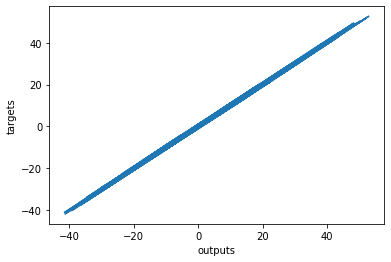

In [31]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show

In [33]:
print(tf.__version__)

2.2.0
